In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [45]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Create a practice set of random latitude and longitude combinations.
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = zip(x, y)

In [6]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

25.12903645 -67.59741259
25.92017388 11.09532135
26.62509167 74.84233102
-59.98969384 -76.89176677
37.30571269 -61.13376282


In [7]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
coordinates
len(coordinates)



1500

In [8]:
from citipy import citipy


In [9]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

628

In [10]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [42]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
city_data

Beginning Data Retrieval     
-----------------------------


[]

In [44]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + "i"


In [40]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Country": city_country,
                          "Date": city_date,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind})
                        
                          

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Processing Record 29 of Set 25 | atuona
Processing Record 30 of Set 25 | lazaro cardenas
Processing Record 31 of Set 25 | buraydah
Processing Record 32 of Set 25 | samusu
City not found. Skipping...
Processing Record 33 of Set 25 | mataura
Processing Record 34 of Set 25 | barrow
Processing Record 35 of Set 25 | nikolskoye
Processing Record 36 of Set 25 | busselton
Processing Record 37 of Set 25 | pokrovsk-uralskiy
City not found. Skipping...
Processing Record 38 of Set 25 | new norfolk
Processing Record 39 of Set 25 | san cristobal
Processing Record 40 of Set 25 | bengkulu
Processing Record 41 of Set 25 | hamilton
Processing Record 42 of Set 25 | ushuaia
Processing Record 43 of Set 25 | ponta pora
Processing Record 44 of Set 25 | mys shmidta
City not found. Skipping...
Processing Record 45 of Set 25 | qaanaaq
Processing Record 46 of Set 25 | hithadhoo
Processing Record 47 of Set 25 | mendahara
City not found. Skipping...
Processing Record 48 of Set 25 | vila velha
Processing Record 49 

City not found. Skipping...
Processing Record 35 of Set 28 | itzehoe
Processing Record 36 of Set 28 | santa monica
Processing Record 37 of Set 28 | mar del plata
Processing Record 38 of Set 28 | kadykchan
City not found. Skipping...
Processing Record 39 of Set 28 | hasaki
Processing Record 40 of Set 28 | carutapera
Processing Record 41 of Set 28 | nizhneyansk
City not found. Skipping...
Processing Record 42 of Set 28 | sitka
Processing Record 43 of Set 28 | nanortalik
Processing Record 44 of Set 28 | sao filipe
Processing Record 45 of Set 28 | castro
Processing Record 46 of Set 28 | hovd
Processing Record 47 of Set 28 | broken hill
Processing Record 48 of Set 28 | moose factory
Processing Record 49 of Set 28 | pacific grove
Processing Record 50 of Set 28 | saint-pierre
Processing Record 1 of Set 29 | maldonado
Processing Record 2 of Set 29 | angoche
Processing Record 3 of Set 29 | severo-kurilsk
Processing Record 4 of Set 29 | marsabit
Processing Record 5 of Set 29 | la sarre
Processin

Processing Record 21 of Set 32 | lavrentiya
Processing Record 22 of Set 32 | haibowan
City not found. Skipping...
Processing Record 23 of Set 32 | faanui
Processing Record 24 of Set 32 | ngaoundere
Processing Record 25 of Set 32 | yakovlevka
Processing Record 26 of Set 32 | khandagayty
Processing Record 27 of Set 32 | yebaishou
Processing Record 28 of Set 32 | nuuk
Processing Record 29 of Set 32 | kerchevskiy
Processing Record 30 of Set 32 | eureka
Processing Record 31 of Set 32 | yeovil
Processing Record 32 of Set 32 | rungata
City not found. Skipping...
Processing Record 33 of Set 32 | toamasina
Processing Record 34 of Set 32 | vuktyl
Processing Record 35 of Set 32 | zamosc
Processing Record 36 of Set 32 | half moon bay
Processing Record 37 of Set 32 | hambantota
Processing Record 38 of Set 32 | maragogi
Processing Record 39 of Set 32 | westport
Processing Record 40 of Set 32 | ust-kamchatsk
City not found. Skipping...
Processing Record 41 of Set 32 | kamenskoye
City not found. Skipp

Processing Record 1 of Set 36 | sarankhola
Processing Record 2 of Set 36 | jiexiu
Processing Record 3 of Set 36 | liverpool
Processing Record 4 of Set 36 | maun
Processing Record 5 of Set 36 | murgab
Processing Record 6 of Set 36 | tilichiki
Processing Record 7 of Set 36 | paita
Processing Record 8 of Set 36 | ribas do rio pardo
Processing Record 9 of Set 36 | sassandra
Processing Record 10 of Set 36 | atambua
Processing Record 11 of Set 36 | henties bay
Processing Record 12 of Set 36 | kutum
Processing Record 13 of Set 36 | verkhniye tatyshly
Processing Record 14 of Set 36 | eirunepe
Processing Record 15 of Set 36 | coffs harbour
Processing Record 16 of Set 36 | lady frere
Processing Record 17 of Set 36 | brahmapuri
City not found. Skipping...
Processing Record 18 of Set 36 | qasigiannguit
Processing Record 19 of Set 36 | katsiveli
City not found. Skipping...
Processing Record 20 of Set 36 | portland
Processing Record 21 of Set 36 | kalininsk
Processing Record 22 of Set 36 | mundgod
P

In [41]:
len(city_data)

1150

In [15]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head()
city_data_df[city_data_df["City"] == 'Tuktoyaktuk']

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
24,Tuktoyaktuk,CA,2020-11-06 00:51:24,69.45,-133.04,1.4,70,20,9.17


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")


In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [18]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'11/05/20'

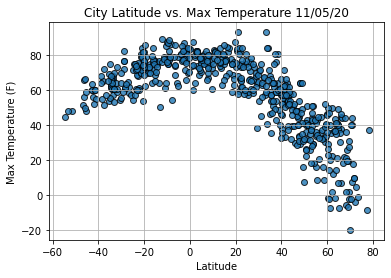

In [19]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

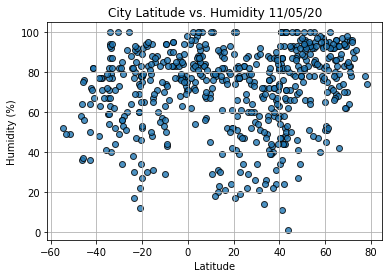

In [20]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()


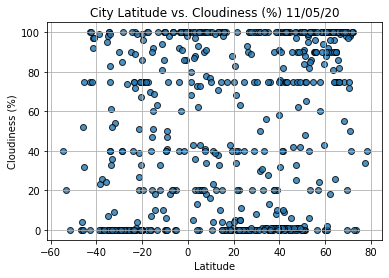

In [21]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

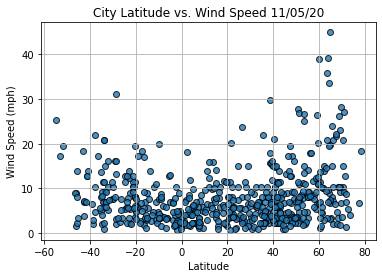

In [22]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [23]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress



In [24]:
index13 = city_data_df.loc[13] 
index13

City                      Qaanaaq
Country                        GL
Date          2020-11-06 00:51:22
Lat                         77.48
Lng                        -69.36
Max Temp                    -8.39
Humidity                       78
Cloudiness                     34
Wind Speed                   6.67
Name: 13, dtype: object

In [25]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.title(title)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [26]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
northern_hemi_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Lazaro Cardenas,MX,2020-11-06 00:51:20,17.96,-102.20,77.94,80,3,4.43
2,Buraydah,SA,2020-11-06 00:51:04,26.33,43.98,66.20,29,0,3.29
4,Barrow,US,2020-11-06 00:47:15,71.29,-156.79,17.60,78,40,12.75
5,Nikolskoye,RU,2020-11-06 00:51:21,59.70,30.79,46.40,65,0,20.13
8,San Cristobal,VE,2020-11-06 00:51:21,7.77,-72.22,66.85,92,34,1.05
...,...,...,...,...,...,...,...,...,...
569,Nuevo Progreso,MX,2020-11-06 00:52:50,23.17,-97.95,73.00,61,11,1.01
570,Owase,JP,2020-11-06 00:52:50,34.07,136.20,65.59,47,56,2.28
571,Ayan,RU,2020-11-06 00:52:50,56.45,138.17,20.44,84,0,17.85
572,Kungurtug,RU,2020-11-06 00:52:50,50.60,97.52,22.48,94,100,5.77


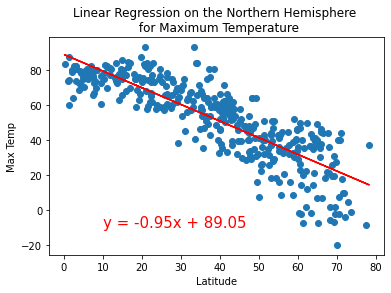

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,-10))
                       

In [28]:
linregress(x_values, y_values)

LinregressResult(slope=-0.9543134085223437, intercept=89.04583738186065, rvalue=-0.8408359152876245, pvalue=1.529127121148821e-106, stderr=0.031028931179633734)

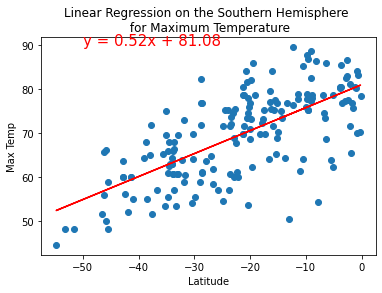

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Southern Hemisphere \n for Maximum Temperature", 'Max Temp',(-50,90))
                        

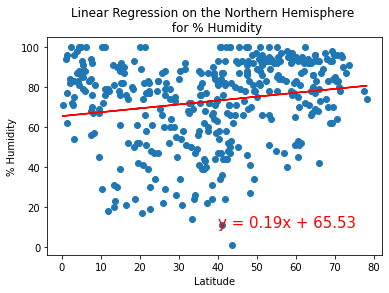

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))
                        

In [31]:
linregress(x_values, y_values)

LinregressResult(slope=0.19448104882349837, intercept=65.53170746717291, rvalue=0.18451610448248323, pvalue=0.00023089304556157751, stderr=0.05232125547402001)

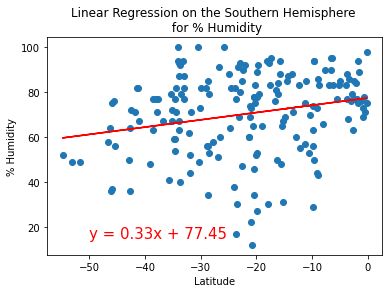

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))
                       

In [33]:
 (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

linregress(x_values, y_values)

LinregressResult(slope=0.3251197610647185, intercept=77.45069555987206, rvalue=0.23251163110074835, pvalue=0.0016341946711321738, stderr=0.10164911065476397)

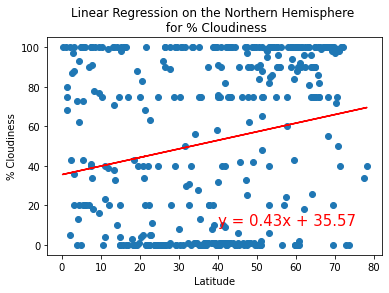

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(40,10))
                        

In [35]:
linregress(x_values, y_values)

LinregressResult(slope=0.4338975584581062, intercept=35.57271009835021, rvalue=0.20608954047920092, pvalue=3.754391100533784e-05, stderr=0.10405519307245237)

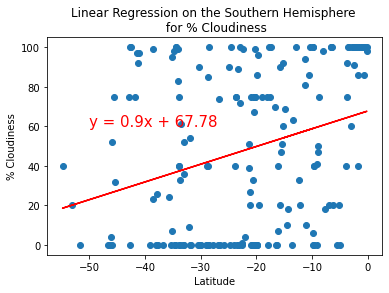

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))
                        

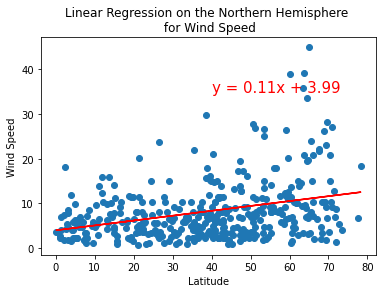

In [37]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))
                        

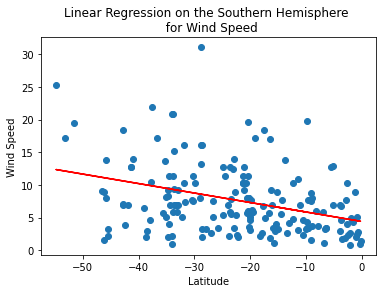

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n  for Wind Speed', 'Wind Speed',(-50,35))


                       

In [39]:
linregress(x_values, y_values)

LinregressResult(slope=-0.14499245841409267, intercept=4.406666500701229, rvalue=-0.36469891708510926, pvalue=4.477115196280722e-07, stderr=0.0276689479019046)